In [2]:
from IPython.display import display_latex
from IPython.display import YouTubeVideo
from IPython.display import Audio

In [3]:
YouTubeVideo('BWJZeiYPfc8')

In [3]:
# Audio('12.mp3')
Audio(url='http://zhangmenshiting.qianqian.com/data2/music/ddf2b2c672464a63c9ab76e342671f44/596821172/596821172.mp3?xcode=26f32a30b022ee47e9c5304b21fec782',autoplay=True)

In [7]:
%%latex
$\large \left(\frac{dx}{dy}\right)^{1/3} \quad \frac{\partial f(xy)} {\partial x}$

<IPython.core.display.Latex object>

$c = \sqrt{a^2 + b^2}$

$_{10}x_1^2+\sqrt{2\pi}+\gamma \quad \backslash \\
a+b \\
c+d$

$\int_{-\infty}^{+\infty}\widehat {f(x)}\lambda\, dx$

$\int f(x) dx$

\begin{align}
a_1 & = b_1 + c_1 \\
a_2 & = b_2 + c_2 + d_2
\end{align}

$\mathcal y=mx+b$

$\nabla$

$P(A\mid B)P(A\vert B)$

$\left\lgroup \matrix{a & b\cr c & d} \right\rgroup$

[Latex URL](http://data-blog.udacity.com/posts/2016/10/latex-primer/)

$$\mathcal \Large e^x=\sum_{n=0}^\infty\frac{x^n}{n!}$$

$\overline{abs}$

$\Large e^{i\pi}+1=0$

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
x=np.arange(1,10)

In [12]:
y=3*x+1

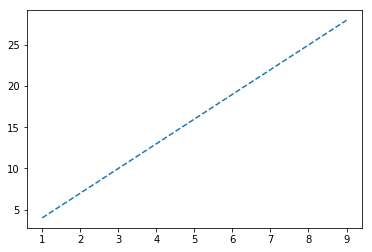

In [13]:
plt.plot(x,y,linestyle='--')

In [14]:
plt.style.available

['bmh',
 'seaborn-notebook',
 'Solarize_Light2',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-paper',
 'classic',
 'seaborn-muted',
 'fast',
 'dark_background',
 'seaborn',
 'seaborn-colorblind',
 'seaborn-poster',
 'ggplot',
 '_classic_test',
 'grayscale',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-deep',
 'tableau-colorblind10',
 'seaborn-ticks',
 'seaborn-dark',
 'seaborn-pastel',
 'seaborn-darkgrid']

In [32]:
plt.style.use(['bmh','seaborn-bright'])

Introduction
------------

This tutorial will give an introduction to DCGANs through an example. We
will train a generative adversarial network (GAN) to generate new
celebrities after showing it pictures of many real celebrities. Most of
the code here is from the dcgan implementation in
`pytorch/examples <https://github.com/pytorch/examples>`__, and this
document will give a thorough explanation of the implementation and shed
light on how and why this model works. But don’t worry, no prior
knowledge of GANs is required, but it may require a first-timer to spend
some time reasoning about what is actually happening under the hood.
Also, for the sake of time it will help to have a GPU, or two. Lets
start from the beginning.

Generative Adversarial Networks
-------------------------------

What is a GAN?
~~~~~~~~~~~~~~

GANs are a framework for teaching a DL model to capture the training
data’s distribution so we can generate new data from that same
distribution. GANs were invented by Ian Goodfellow in 2014 and first
described in the paper `Generative Adversarial
Nets <https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf>`__.
They are made of two distinct models, a *generator* and a
*discriminator*. The job of the generator is to spawn ‘fake’ images that
look like the training images. The job of the discriminator is to look
at an image and output whether or not it is a real training image or a
fake image from the generator. During training, the generator is
constantly trying to outsmart the discriminator by generating better and
better fakes, while the discriminator is working to become a better
detective and correctly classify the real and fake images. The
equilibrium of this game is when the generator is generating perfect
fakes that look as if they came directly from the training data, and the
discriminator is left to always guess at 50% confidence that the
generator output is real or fake.

Now, lets define some notation to be used throughout tutorial starting
with the discriminator. Let $x$ be data representing an image.
$D(x)$ is the discriminator network which outputs the (scalar)
probability that $x$ came from training data rather than the
generator. Here, since we are dealing with images the input to
$D(x)$ is an image of HWC size 3x64x64. Intuitively, $D(x)$
should be HIGH when $x$ comes from training data and LOW when
$x$ comes from the generator. $D(x)$ can also be thought of
as a traditional binary classifier.

For the generator’s notation, let $z$ be a latent space vector
sampled from a standard normal distribution. $G(z)$ represents the
generator function which maps the latent vector $z$ to data-space.
The goal of $G$ is to estimate the distribution that the training
data comes from ($p_{data}$) so it can generate fake samples from
that estimated distribution ($p_g$).

So, $D(G(z))$ is the probability (scalar) that the output of the
generator $G$ is a real image. As described in `Goodfellow’s
paper <https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf>`__,
$D$ and $G$ play a minimax game in which $D$ tries to
maximize the probability it correctly classifies reals and fakes
($logD(x)$), and $G$ tries to minimize the probability that
$D$ will predict its outputs are fake ($log(1-D(G(x)))$).
From the paper, the GAN loss function is
$$\begin{align}\underset{G}{\text{min}} \underset{D}{\text{max}}V(D,G) = \mathbb{E}_{x\sim p_{data}(x)}\big[logD(x)\big] + \mathbb{E}_{z\sim p_{z}(z)}\big[log(1-D(G(x)))\big]\end{align}$$

In theory, the solution to this minimax game is where
$p_g = p_{data}$, and the discriminator guesses randomly if the
inputs are real or fake. However, the convergence theory of GANs is
still being actively researched and in reality models do not always
train to this point.

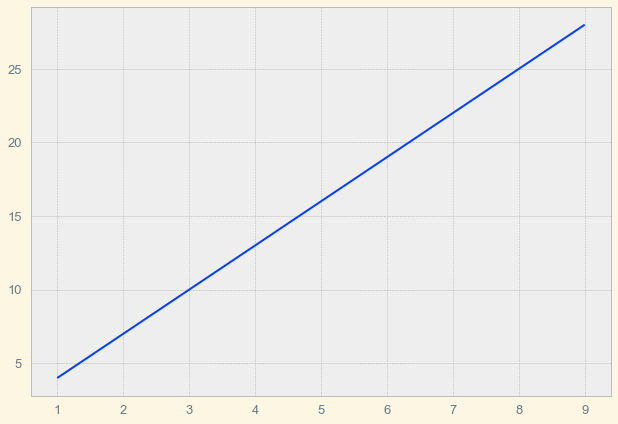

In [34]:
plt.plot(x,y)

In [35]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '#bcbcbc',
          'axes.facecolor': '#eeeeee',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes

$\bar x\, \overline{abc}$
$\vec x \quad \overrightarrow {xyz}$
$\huge \left[\frac{x}{y} \right]$
$$\Huge \sqrt[3]{\pi^2}$$
$$\sum_{n=0}^n \prod_{i=1}^n$$
$\oint \; \iint \; \cdot \; \times$
$\cdots \; \ddots \; \vdots$

In [1]:
!python -V

Python 3.5.4 :: Continuum Analytics, Inc.


In [5]:
%%js
console.log(navigator.userAgent)

<IPython.core.display.Javascript object>